In [6]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [8]:
PATH = '../data/'

In [9]:
train_dir = os.path.join(PATH, 'train')
test_dir = os.path.join(PATH, 'test')

In [10]:
train_benign_dir = os.path.join(train_dir, 'benign')
train_malignant_dir = os.path.join(train_dir, 'malignant')
test_benign_dir = os.path.join(test_dir, 'benign')
test_malignant_dir = os.path.join(test_dir, 'malignant')

## processing variables

In [11]:
batch_size = 128
epochs = 5
IMG_DIMENSION = 244

In [12]:
train_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

In [13]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_DIMENSION, IMG_DIMENSION),
                                                           class_mode='binary')

Found 2637 images belonging to 2 classes.


In [14]:
test_data_gen = test_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=test_dir,
                                                              target_size=(IMG_DIMENSION, IMG_DIMENSION),
                                                              class_mode='binary')

Found 660 images belonging to 2 classes.


In [15]:
def plot_images(img_arr):
    fig, axes = plt.subplots(1, 5, figsize=(25, 25))
    axes = axes.flatten()
    for img, ax in zip(img_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

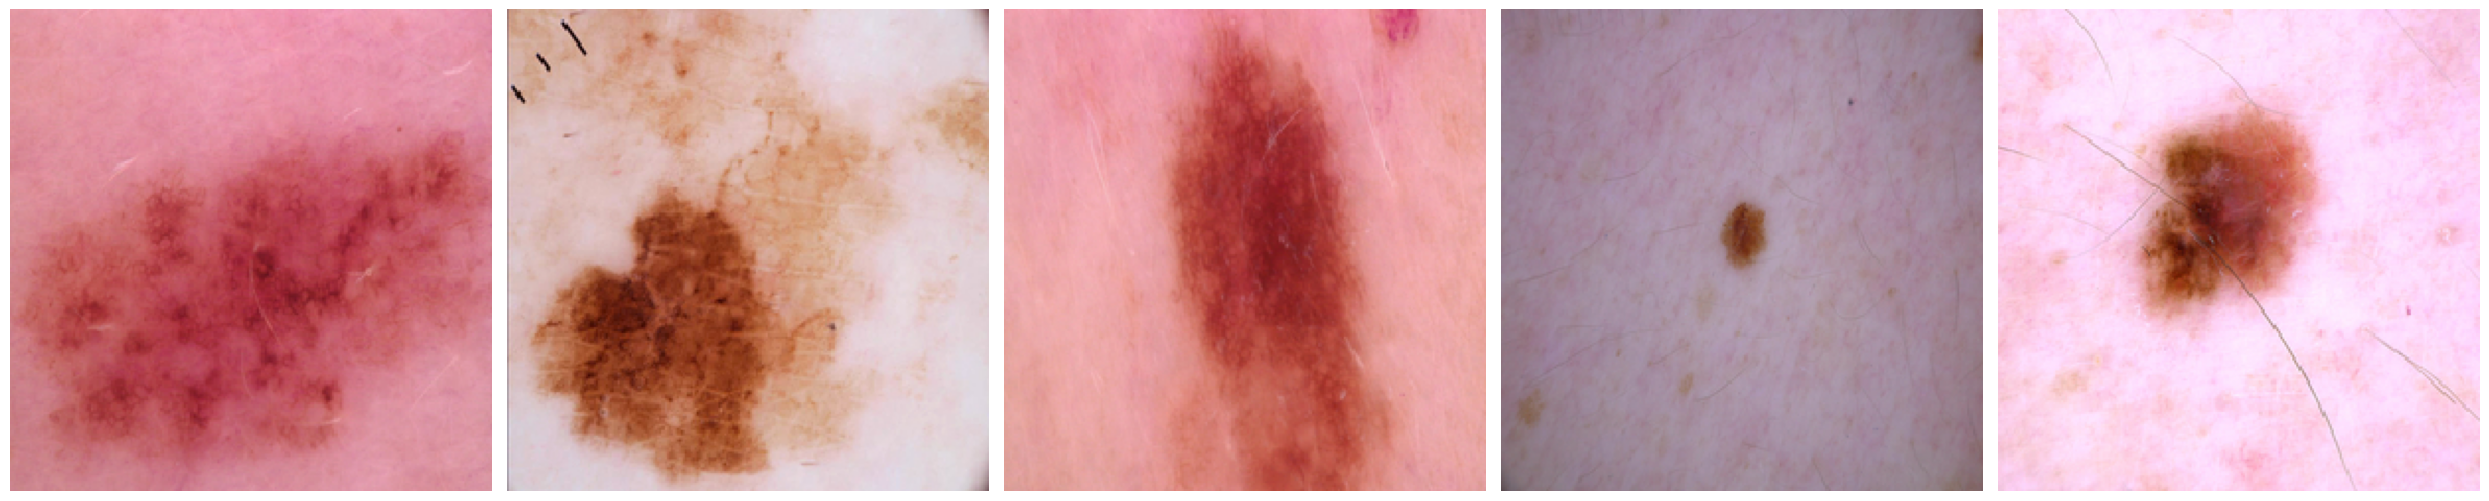

In [16]:
sample_training_images, _ = next(train_data_gen)

plot_images(sample_training_images[:5])

In [17]:
model = Sequential([Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_DIMENSION, IMG_DIMENSION, 3)),
                    MaxPooling2D(),
                    Conv2D(32, 3, padding='same', activation='relu'),
                    MaxPooling2D(),
                    Conv2D(64, 3, padding='same', activation='relu'),
                    MaxPooling2D(),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1)])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 244, 244, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 122, 122, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [20]:
total_train_size = len(os.listdir(train_benign_dir)) + len(os.listdir(train_malignant_dir))
total_test_size = len(os.listdir(test_benign_dir)) + len(os.listdir(test_malignant_dir))
total_data_size = total_train_size + total_test_size

In [21]:
history = model.fit_generator(train_data_gen,
                              steps_per_epoch=total_train_size // batch_size,
                              epochs=epochs,
                              validation_data=test_data_gen,
                              validation_steps=total_test_size // batch_size)

C:\Users\musta\AppData\Local\Temp\ipykernel_11504\2865038257.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data_gen,


Epoch 1/5
20/20 [==============================] - 76s 4s/step - loss: 1.1636 - accuracy: 0.5548 - val_loss: 0.5801 - val_accuracy: 0.5703
Epoch 2/5
20/20 [==============================] - 58s 3s/step - loss: 0.5164 - accuracy: 0.6959 - val_loss: 0.4716 - val_accuracy: 0.6828
Epoch 3/5
20/20 [==============================] - 59s 3s/step - loss: 0.4679 - accuracy: 0.7254 - val_loss: 0.4751 - val_accuracy: 0.7875
Epoch 4/5
20/20 [==============================] - 58s 3s/step - loss: 0.4068 - accuracy: 0.7812 - val_loss: 0.3802 - val_accuracy: 0.8203
Epoch 5/5
20/20 [==============================] - 60s 3s/step - loss: 0.3649 - accuracy: 0.7935 - val_loss: 0.3897 - val_accuracy: 0.7719


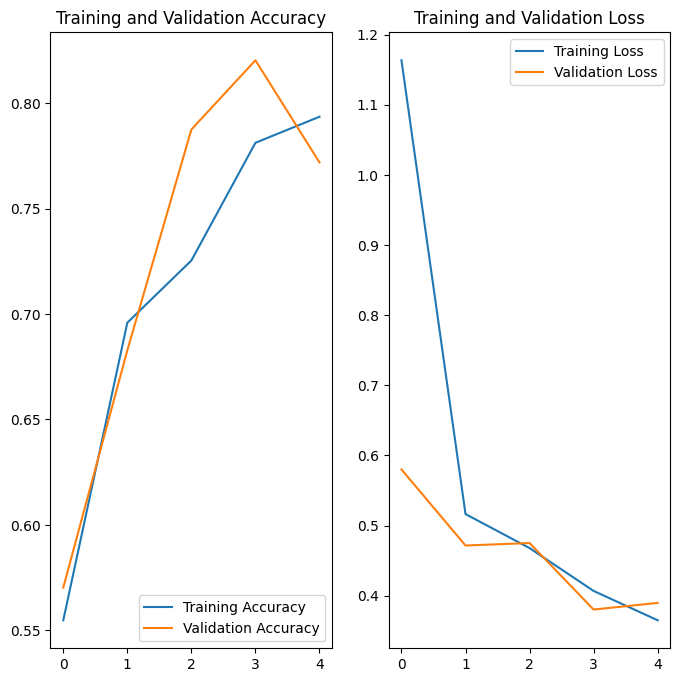

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
tf.keras.models.save_model(model,'my_model.hdf5')

In [49]:
import cv2
from PIL import Image, ImageOps
file= os.path.join(test_benign_dir, '1800.jpg')
image_data = Image.open(file)


   
image=image_data
image = np.asarray(image)
img = image
img_resize = (cv2.resize(img, dsize=(244, 244),    interpolation=cv2.INTER_CUBIC))/255.
        
img_reshape = img_resize[np.newaxis,...]
    
prediction = model.predict(img_reshape)
print(prediction)




1/1 [==============================] - 0s 44ms/step
[[-1.5931184]]
